In [67]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

data=pd.read_csv('C:/Users/Virag/Desktop/Machine Learning/practice4/data/poly.csv')

labels=data.values[:,-1]
data=data.values[:,0]


In [68]:
num = int(data.shape[0]/2)
train_set = []
test_set = []
train_labels = []
test_labels = []
i = 0
while i < data.shape[0]:
    train_set.append(data[i])
    test_set.append(data[i+1])
    train_labels.append(labels[i])
    test_labels.append(labels[i+1])
    i += 2
    #train_set, test_set = data[:num], data[num:]
    #train_labels, test_labels = labels[:num], labels[num:]



In [69]:
def mean_square_error(A, B):
    return np.square(np.subtract(A, B)).mean()

In [74]:
mse_vec = []
for i in range(10):
    polynomial = np.polyfit(train_set,train_labels,i)
    value = np.polyval(polynomial,test_set)
    mse = mean_square_error(value,test_labels)
    mse_vec.append(mse)

print("The mse values on the test data: ")
print(mse_vec)
print("The best degree:")
print(mse_vec.index(min(mse_vec))+1)
    

The mse values on the test data: 
[1254.6329742693351, 1253.1752946581446, 477.70597027643254, 130.03442402589835, 112.95563973374432, 112.72926922675639, 112.95560132937918, 118.12114671886995, 116.62486411187923, 118.85671999309832]
The best degree:
6


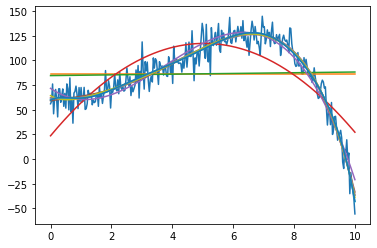

In [78]:
import matplotlib.pyplot as plt
plt.plot(data,labels)
for i in range(10):
    polynomial = np.polyfit(data,labels,i)
    value = np.polyval(polynomial,data)
    plt.plot(data,value)

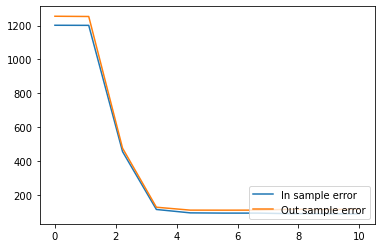

In [89]:
mse_in_sample = [] #for the train data
mse_out_sample = [] #for the test data
for i in range(10):
    polynomial = np.polyfit(train_set,train_labels,i)
    value_in = np.polyval(polynomial,train_set)
    value_out = np.polyval(polynomial,test_set)
    mse_in = mean_square_error(value_in,train_labels)
    mse_out = mean_square_error(value_out,test_labels)
    mse_in_sample.append(mse_in)
    mse_out_sample.append(mse_out)

plt.plot(np.linspace(0,10,10),mse_in_sample, label="In sample error")
plt.plot(np.linspace(0,10,10),mse_out_sample, label="Out sample error")
plt.legend(loc='lower right')